# Introduction

### Import the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### Notebook display settings

In [2]:
# Change the maximum number of rows displayed when viewing 
# the pandas dataframe
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

import os
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

### Default figure settings

In [3]:
# Set plot properties
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.labelweight']='normal'
mpl.rcParams['figure.figsize']=(8,6)
# Choose the font for the plots based on os (as some fonts are not 
# available across different os)
if os.name=='nt':
    mpl.rcParams['font.family'] = "sans-serif"
    mpl.rcParams['font.sans-serif'] = "Arial"
elif os.name=='posix':  
    mpl.rcParams['font.family'] = "Mukti Narrow"

### Get the number of cpu

In [4]:
import multiprocessing as mp
# Get the number of cpu available for parallel processing
n_cpu=mp.cpu_count()

# Data Transformation & Exploration

## Read the data

In [5]:
# Read the csv file 
data=pd.read_csv('Data/epl-training.csv')
# Dropping the trailing columns
data.dropna(axis=1, how='all',inplace=True)
data.drop([column for column in data.columns if 'Unnamed' in column], axis = 1, inplace=True) 
data.shape

(4180, 22)

In [6]:
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2008,Arsenal,West Brom,1,0,H,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0
1,16/08/2008,Bolton,Stoke,3,1,H,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0
2,16/08/2008,Everton,Blackburn,2,3,A,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0
3,16/08/2008,Hull,Fulham,2,1,H,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0
4,16/08/2008,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0


## Exploratory Data Analysis

In [7]:
def get_pivot_column_vs_column_count(df,col1,col2):
    '''
    This function returns a dataframe after pivoting a column 
    against another column.
    
    Parameters:
        df (DataFrame): 
        col1 (str):
        col2 (str):
    
    Returns:
        (DataFrame): 
    '''
    return df.groupby([col1,col2]).size().reset_index().\
              rename(columns={0:'counts'}).\
              pivot(values='counts',index=col1,columns=col2)

In [8]:
def get_column_countplot(df,col,y='FTR',ax=None ):
    '''
    This function 
    
    Parameters:
        df (DataFrame):
        col (str):
        y (str ; default:'FTR'):
        ax (obj ; default: None): Axes of the plot
    
    Returns:
        None
    '''
    if ax is None:
        ax = plt.gca()
    df.groupby([col, y]).size().reset_index().\
       pivot(columns=y, index=col, values=0).\
       plot(kind='bar', stacked=True,ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Counts')
    ax.set_title('Count Plot: %s'%(col))

#### Number of matches

In [9]:
get_pivot_column_vs_column_count(data,'HomeTeam','AwayTeam')

AwayTeam,Arsenal,Aston Villa,Birmingham,Blackburn,Blackpool,Bolton,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Hull,Leicester,Liverpool,Man City,Man United,Middlesbrough,Newcastle,Norwich,Portsmouth,QPR,Reading,Southampton,Stoke,Sunderland,Swansea,Tottenham,Watford,West Brom,West Ham,Wigan,Wolves
HomeTeam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arsenal,NaN,8.0,2.0,4.0,1.0,4.0,4.0,2.0,5.0,2.0,11.0,6.0,11.0,7.0,2.0,5.0,5.0,11.0,11.0,11.0,2.0,9.0,4.0,2.0,3.0,1.0,7.0,10.0,9.0,7.0,11.0,4.0,9.0,10.0,5.0,4.0
Aston Villa,8.0,NaN,2.0,4.0,1.0,4.0,1.0,NaN,2.0,1.0,8.0,3.0,8.0,6.0,NaN,4.0,2.0,8.0,8.0,8.0,1.0,7.0,4.0,2.0,3.0,1.0,4.0,8.0,8.0,5.0,8.0,1.0,7.0,7.0,5.0,3.0
Birmingham,2.0,2.0,NaN,2.0,1.0,2.0,NaN,NaN,1.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,2.0
Blackburn,4.0,4.0,2.0,NaN,1.0,4.0,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Blackpool,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0
Bolton,4.0,4.0,2.0,4.0,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Bournemouth,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,4.0,4.0,4.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,NaN,NaN,NaN,4.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,NaN,1.0
Brighton,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,NaN,1.0
Burnley,5.0,2.0,1.0,1.0,NaN,1.0,3.0,2.0,NaN,1.0,5.0,4.0,5.0,2.0,2.0,3.0,4.0,5.0,5.0,5.0,1.0,3.0,NaN,1.0,1.0,NaN,4.0,4.0,3.0,3.0,5.0,3.0,3.0,5.0,1.0,2.0


### HTR vs. FTR

In [10]:
get_pivot_column_vs_column_count(data,'HTR','FTR')

FTR,A,D,H
HTR,,,
A,703,199,99
D,439,647,646
H,70,191,1186


In [11]:
# Save the column names of categorical features as a list
cat_col_list=[x for x in data.columns\
              if x not in ['Date','HomeTeam','AwayTeam','Referee','FTR','HTR']]

In [12]:
cat_col_list = np.reshape(cat_col_list, (8, 2))

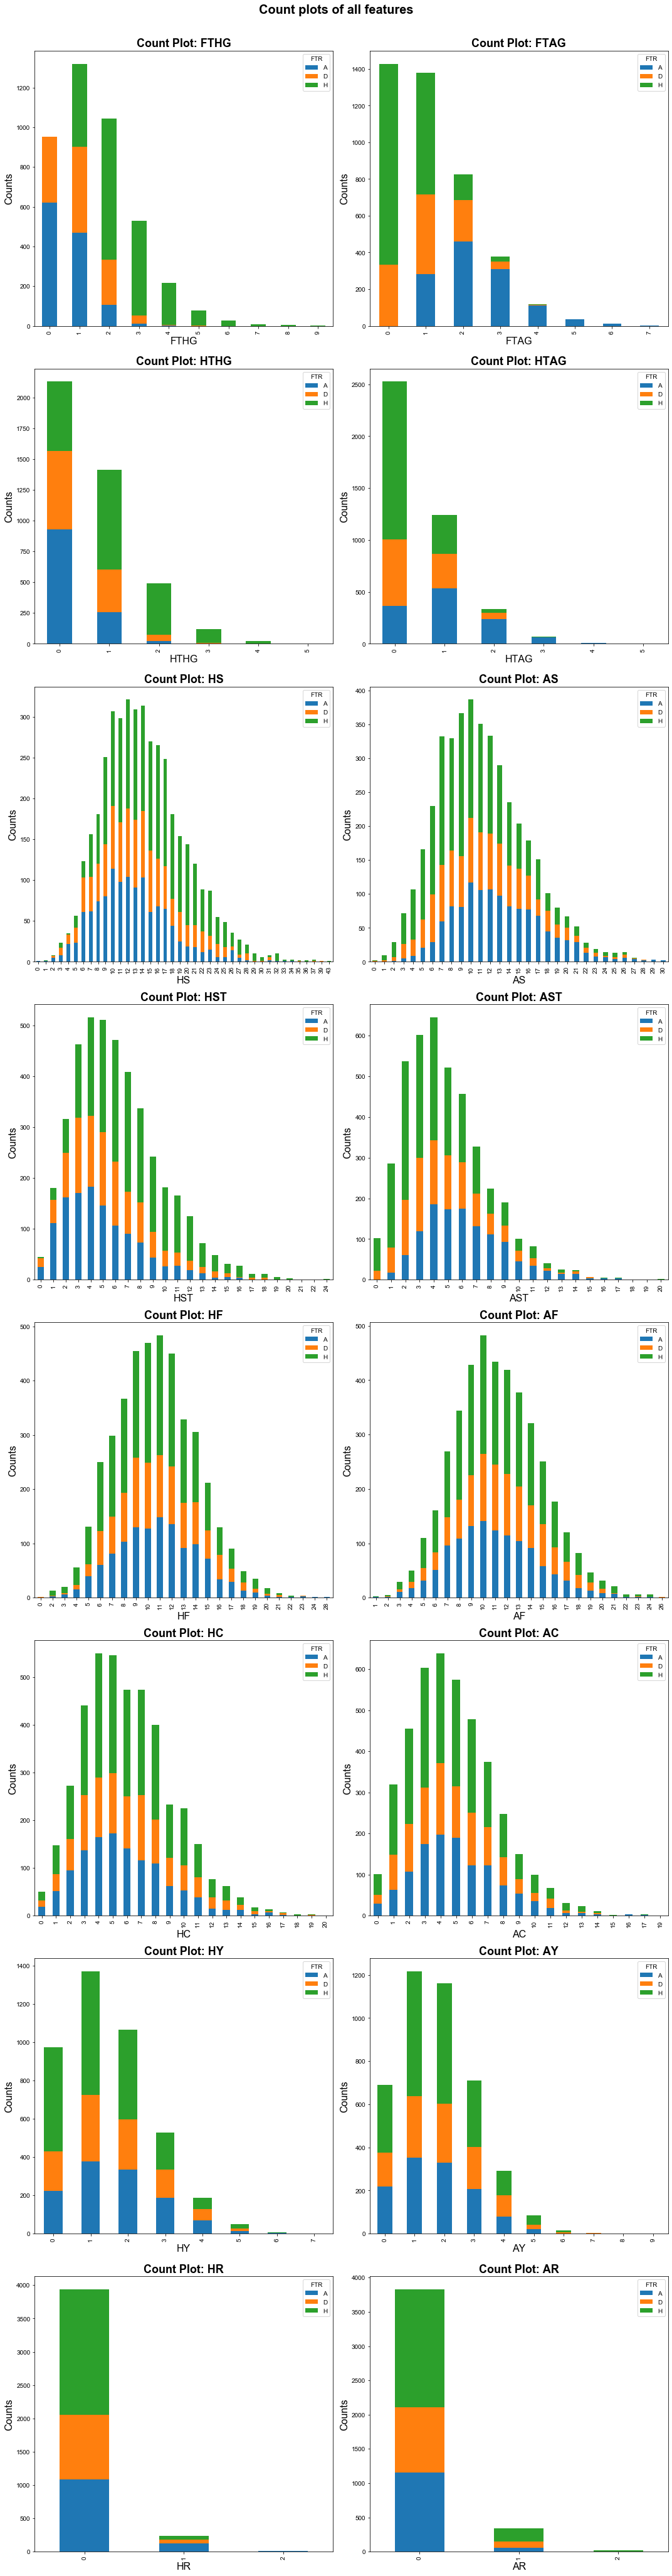

In [13]:
# Call the function get_column_countplot() to plot the count plot of
# the categorical columns as s ubplots in a figure
fig, axes = plt.subplots(8,2,figsize=(15,60))
for i in range(8):
    for j in range(2):
        get_column_countplot(data,cat_col_list[i][j], ax=axes[i,j])
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle("Count plots of all features",fontweight='bold',fontsize=20)
plt.show()

### Number of referees

There are 36 referees (possibly one from each team).

In [14]:
data['Referee'].nunique()

36

### Checking the dataset is balanced

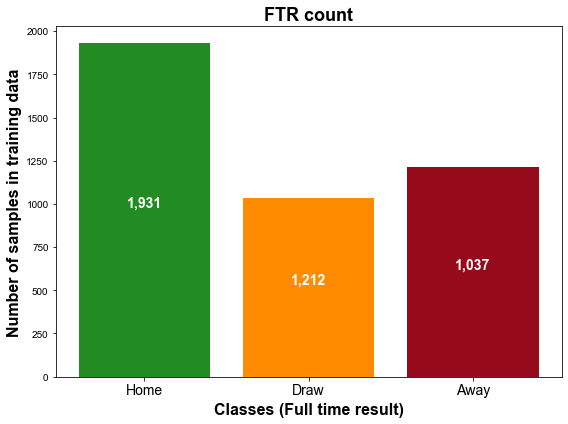

In [16]:
# Get the counts 
count_val=data['FTR'].value_counts()

# Visualise the count
X_ticks=['Home','Draw','Away']
bar_width=0.7
fig,ax=plt.subplots()
plt.bar(1,count_val[0],color='forestgreen')
plt.bar(2,count_val[2],color='darkorange')
plt.bar(3,count_val[1],color='#970a1b')
plt.text(1, count_val[0]/2, "{:,}".format(count_val[0]),color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(2, count_val[2]/2, "{:,}".format(count_val[1]), color='w'
         ,ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(3, count_val[1]/2, "{:,}".format(count_val[2]), color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
ax.set_title('FTR count',fontsize=18,fontweight='bold')
ax.set_xlabel('Classes (Full time result)',fontsize=16,fontweight='bold')
ax.set_ylabel('Number of samples in training data',fontsize=16,
              fontweight='bold')
ax.set_xticks([1,2,3])
ax.set_xticklabels(X_ticks,fontsize=14)
fig.tight_layout()
plt.show()

### Calculate the correlation between the features

In [36]:
correlation = data.corr()
corr_array  = np.array(correlation)

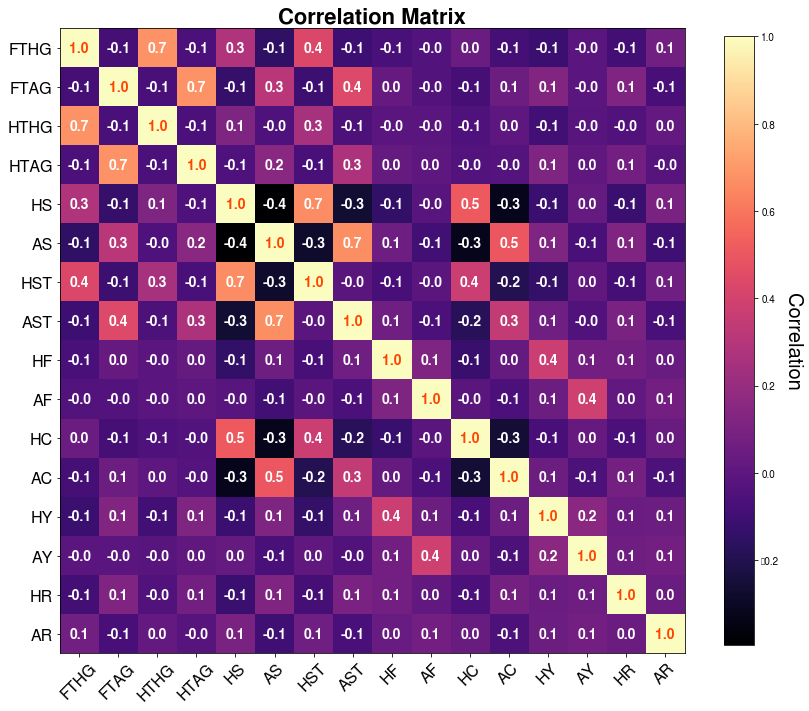

In [39]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(corr_array,cmap='magma')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom",fontsize=20)
data = im.get_array()
textcolors=['#FFFFFF','#FF4500']
for i in range(correlation.shape[0]):
        for j in range(correlation.shape[1]):
            text = im.axes.text(j, i, '%1.1f'%data[i, j], 
                                color=textcolors[data[i, j]>0.85],
                                ha='center',va='center',fontsize=14,fontweight='bold')
ax.set_title('Correlation Matrix',fontsize=22,fontweight='bold')
ax.set_xticks(np.arange(len(correlation.columns.tolist())))
ax.set_yticks(np.arange(len(correlation.columns)))
ax.set_xticklabels(correlation.columns,fontsize=16,rotation=45)
ax.set_yticklabels(correlation.columns,fontsize=16)
plt.show()

## Feature Extraction

In [19]:
correlation = data.corr()
corr_array  = np.array(correlation)

In [20]:
correlation

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
FTHG,1.000000,-0.081805,0.683172,-0.057260,0.284798,-0.148790,0.428439,-0.105392,-0.064548,-0.034719,0.049717,-0.080659,-0.114817,-0.008798,-0.086560,0.072941
FTAG,-0.081805,1.000000,-0.073321,0.683327,-0.129285,0.317764,-0.110560,0.440410,0.032507,-0.034898,-0.083307,0.055190,0.127996,-0.008439,0.122558,-0.073715
HTHG,0.683172,-0.073321,1.000000,-0.060664,0.116198,-0.046268,0.250785,-0.056086,-0.013158,-0.012159,-0.050913,0.002536,-0.092927,-0.016632,-0.038977,0.023288
HTAG,-0.057260,0.683327,-0.060664,1.000000,-0.051642,0.154225,-0.065043,0.274243,0.027928,0.001700,-0.030672,-0.026736,0.115716,0.009098,0.077859,-0.023537
HS,0.284798,-0.129285,0.116198,-0.051642,1.000000,-0.394978,0.667025,-0.258896,-0.140515,-0.013870,0.513584,-0.320637,-0.116749,0.028938,-0.115348,0.102895
AS,-0.148790,0.317764,-0.046268,0.154225,-0.394978,1.000000,-0.278790,0.670879,0.060360,-0.090240,-0.322679,0.503014,0.112505,-0.067569,0.118684,-0.097364
HST,0.428439,-0.110560,0.250785,-0.065043,0.667025,-0.278790,1.000000,-0.006542,-0.073731,-0.005241,0.370931,-0.188743,-0.134047,0.013678,-0.084049,0.065647
AST,-0.105392,0.440410,-0.056086,0.274243,-0.258896,0.670879,-0.006542,1.000000,0.067589,-0.057199,-0.175183,0.347722,0.063363,-0.035708,0.103704,-0.066398
HF,-0.064548,0.032507,-0.013158,0.027928,-0.140515,0.060360,-0.073731,0.067589,1.000000,0.113061,-0.118661,0.026472,0.373510,0.078130,0.078446,0.036519
AF,-0.034719,-0.034898,-0.012159,0.001700,-0.013870,-0.090240,-0.005241,-0.057199,0.113061,1.000000,-0.007351,-0.060235,0.055902,0.387334,0.018438,0.076730


NameError: name 'training_data' is not defined

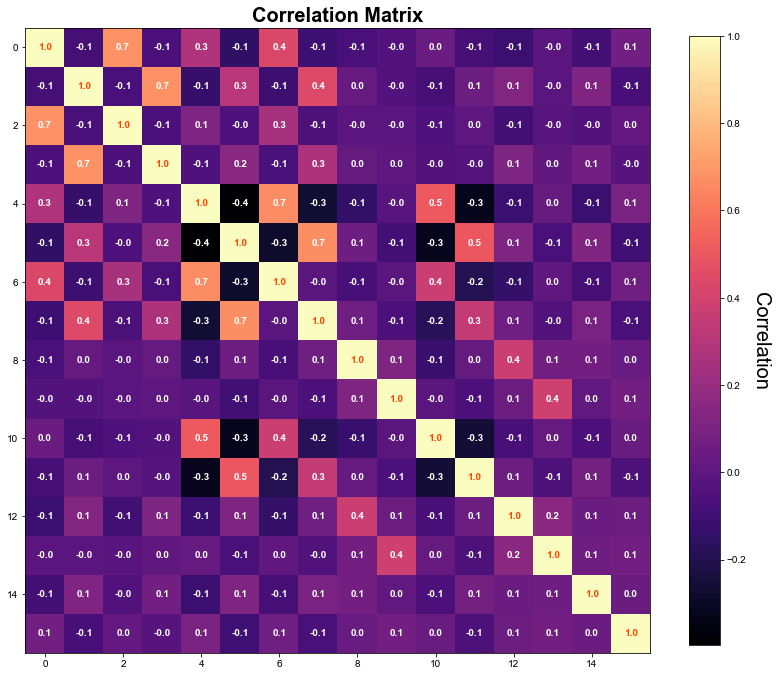

In [21]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(corr_array,cmap='magma')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom",fontsize=20)
heatmap_data = im.get_array()
textcolors=['#FFFFFF','#FF4500']
for i in range(heatmap_data.shape[0]):
        for j in range(heatmap_data.shape[1]):
            text = im.axes.text(j, i, '%1.1f'%heatmap_data[i, j], 
                                color=textcolors[heatmap_data[i, j]>0.85],
                                ha='center',va='center',fontweight='bold')
ax.set_title('Correlation Matrix',fontsize=20,fontweight='bold')
ax.set_xticks(np.arange(len(training_data.columns.tolist())))
ax.set_yticks(np.arange(len(training_data.columns)))
ax.set_xticklabels(training_data.columns)
ax.set_yticklabels(training_data.columns)
plt.show()

In [ ]:
X=training_data[[column for column in training_data.columns if column not in ['Date','FTR']]]
y=training_data['FTR']

### Encode the values

In [20]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,scale,MinMaxScaler
le = LabelEncoder()
for column in ['HomeTeam','AwayTeam','HTR','Referee']:
    X[column]=LabelEncoder().fit_transform(X[column])
y=le.fit_transform(y)

In [19]:
X=data[[column for column in data.columns if column not in ['Date','FTR']]]
y=data['FTR']

### Scale the values

In [ ]:
le = LabelEncoder()
for column in ['HomeTeam','AwayTeam','HTR','Referee']:
    X[column]=LabelEncoder().fit_transform(X[column])
y=le.fit_transform(y)

# Model Training & Validation

## Train the model with all features

`cross_validate` was chosen over `cross_val_score` because the former allows more than one metric scores to be passed together.

In [ ]:
def get_scores(model,X,y):
    '''
    Parameters:
        model
        X
        y
    
    Returns:
    '''
    scores = cross_validate(model_LR, X, y, scoring=('accuracy','f1_macro','precision_macro','recall_macro','roc_auc_ovr'),
                            cv=10, return_train_score=True,n_jobs=n_cpu)
    print('Accuracy: %f'%(scores['test_accuracy'].mean()))
    print('Precision: %f'%(scores['test_precision_macro'].mean()))
    print('Recall: %f'%(scores['test_recall_macro'].mean()))
    print('f1 Score: %f'%(scores['test_f1_macro'].mean()))
    print('ROC-AUC: %f'%(scores['test_roc_auc_ovr'].mean()))
    return scores

In [ ]:
def get_best_params_RandomizedCV(model,X,y,param_grid,refit='accuracy'):
    '''
    This function executes the RandomizedSearchCV() to tune the 
    hyperparameters, prints the best scores and returns the list of 
    best performing hyperparameters.
    
    Parameters:
        model
        X
        y
        param_grid
        refit='accuracy'
    
    Returns:
        grid_results.best_params_ (dictionary):
    '''
    scoring=('accuracy','f1_macro','roc_auc_ovr')
    other_scores=[score for score in list(scoring) if score!=refit] 
    grid_results = RandomizedSearchCV(model, param_grid, 
                                       cv=10,n_jobs=n_cpu,
                                       scoring=scoring,
                                       refit=refit)
    grid_results.fit(X, y)
    print('Best parameters: \n',grid_results.best_params_)
    cv_results=grid_results.cv_results_
    best_index_results = np.nonzero(cv_results['rank_test_%s'%(refit)] == 1)[0][0]
    print('Best mean %s Score: '%(refit),grid_results.best_score_)
    print('Best mean %s Score: '%(other_scores[0]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    print('Best mean %s Score: '%(other_scores[1]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    return grid_results.best_params_

In [ ]:
def get_best_params_GridCV(model,X,y,param_grid,refit='accuracy'):
    '''
    This function executes the GridSearchCV() to tune the 
    hyperparameters, prints the best scores and returns the list of 
    best performing hyperparameters.
    
    Parameters:
    model
    X
    y
    param_grid
    refit='accuracy'
    
    Returns:
    grid_results.best_params_ (dictionary):
    '''
    scoring=('accuracy','f1_macro','roc_auc_ovr')
    other_scores=[score for score in list(scoring) if score!=refit] 
    grid_results = GridSearchCV(model, param_grid, 
                                       cv=10,n_jobs=n_cpu,
                                       scoring=scoring,
                                       refit=refit)
    grid_results.fit(X, y)
    print('Best parameters: \n',grid_results.best_params_)
    cv_results=grid_results.cv_results_
    best_index_results = np.nonzero(cv_results['rank_test_%s'%(refit)] == 1)[0][0]
    print('Best mean %s Score: '%(refit),grid_results.best_score_)
    print('Best mean %s Score: '%(other_scores[0]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    print('Best mean %s Score: '%(other_scores[1]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    return grid_results.best_params_

### Logistic Regression Classifier 

In [ ]:
model_LR = LogisticRegression(n_jobs=n_cpu)
scores_LR=get_scores(model_LR,X,y)

In [ ]:
param_grid={'penalty':['l1','l2','elasticnet']}
best_params_LR=get_best_params_GridCV(model_LR,X,y,param_grid,refit='accuracy')

### k-NN Classifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5,n_jobs=n_cpu)

scores_knn = get_scores(model_LR,X,y)

### Support Vector Machine Classifier

In [ ]:
model_svm = SVC()

scores_svm = cross_validate(model_svm, X, Y, scoring=scoring,cv=10, return_train_score=True,n_jobs=n_cpu)

### Gaussian Naive Bayes Classifier

In [ ]:
model_gnb=GaussianNB()

scores_gnb=cross_validate(model_gnb,X,Y,scoring=scoring,cv=10,n_jobs=n_cpu)

### SGD Classifier

In [ ]:
model_sgd = SGDClassifier(max_iter=1000000, tol=1e-3)

scores_sgd=cross_validate(model_sgd,X,Y,scoring=scoring,cv=10,n_jobs=n_cpu)

### Multi Layer Perceptron Classifier (Neural Networks)

In [ ]:
model_mlp = MLPClassifier(solver='sgd',activation='identity',learning_rate='adaptive',
                          hidden_layer_sizes=(8, 2), random_state=76)
scores_mlp=cross_validate(model_mlp,X,Y,scoring=scoring,cv=10,n_jobs=n_cpu)

### Random Forest Classifier

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=100,n_jobs=n_cpu)

scores_rfc = cross_validate(model_rfc, X, Y, scoring=scoring,cv=10, return_train_score=True,n_jobs=n_cpu)

## Compare the models

## Train model with selected features

# Results

# Final Predictions on Test Set

# Conclusion